I am trying to refactor the the GAHelpers and make a single set of files that make it easy to add/remove algorithms. Where we are changing things in only one place. When complete this should replace some/all of the following:

- AlgorithmParams.py
- AlgorithmSpace.py 
- RunClass.py

Maybe a few others.

TODO: Want to figure out parallel Deap

# Import image files

In [1]:
import sys

###Testing

In [2]:
import logging
logging.basicConfig(stream=sys.stdout, level=logging.ERROR)
#logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [3]:
import cv2

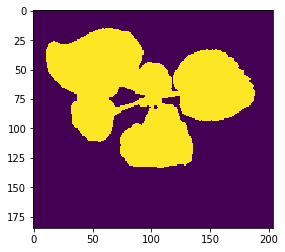

In [19]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from skimage import color

from see import JupyterGUI, Segmentors

img = imageio.imread('Image_data/KOMATSUNA/rgbd_plant/rgb_04_009_05.png')
gmask = imageio.imread('Image_data/KOMATSUNA/rgbd_label/label_04_009_05.png')

gmask = color.rgb2gray(gmask) > 0
plt.imshow(gmask)

# Manual Search Tester

TODO: Cam - Find the best parameters for these functions. Most algorithms come from here:

https://scikit-image.org/docs/dev/api/skimage.segmentation.html

In [20]:
from see import Segmentors

In [21]:
Segmentors.algorithmspace

{'CT': see.Segmentors.ColorThreshold,
 'AAA': see.Segmentors.TripleA,
 'FB': see.Segmentors.Felzenszwalb,
 'SC': see.Segmentors.Slic,
 'QS': see.Segmentors.QuickShift,
 'WS': see.Segmentors.Watershed,
 'CV': see.Segmentors.Chan_Vese,
 'MCV': see.Segmentors.Morphological_Chan_Vese,
 'AC': see.Segmentors.MorphGeodesicActiveContour}

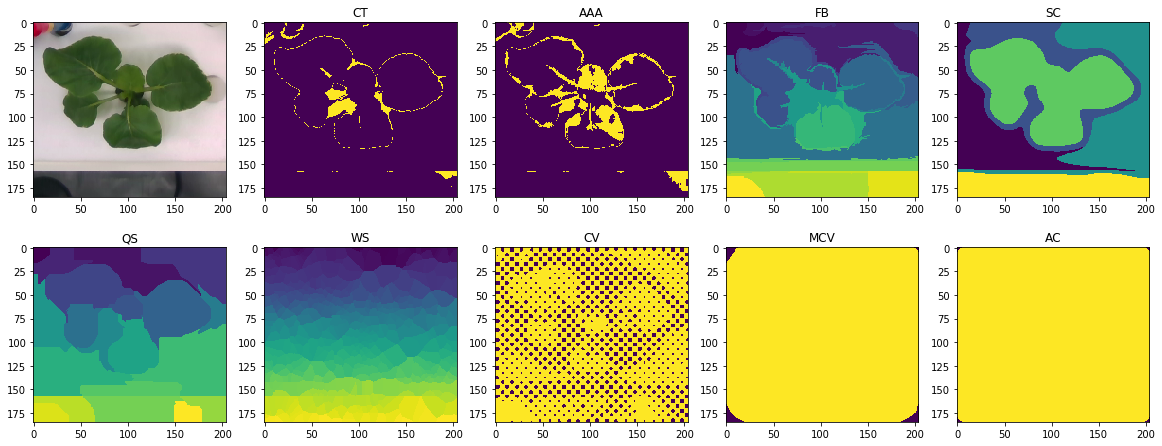

In [22]:
tot = len(Segmentors.algorithmspace)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,5,1)
ax.imshow(img)
for index, segkey in enumerate(Segmentors.algorithmspace):
    ax = fig.add_subplot(5,5,index+2)
    seg = Segmentors.algorithmspace[segkey]()
    mask = seg.evaluate(img.copy())
    ax.imshow(mask)
    plt.title(segkey)

In [23]:
params = ['WS', 7563, 0.13, 2060, 0.01, 4342, 850, 10, 0.57, 1863, 1543, 134, 3, 1, 0.35, (1, 1), 8.1, 'checkerboard', 'checkerboard', 3, 7625, -35, 0.0, 0.0, 0.0]
JupyterGUI.segmentwidget(img, gmask, params)

GridBox(children=(SelectionSlider(continuous_update=False, description='compactness', index=4, options=(0.0001…

Output()

In [24]:
params = ['WS', 7563, 0.13, 2060, 0.01, 4342, 850, 10, 0.57, 1863, 1543, 134, 3, 1, 0.35, (1, 1), 8.1, 'checkerboard', 'checkerboard', 3, 7625, -35, 0.0, 0.0, 0.0]
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)
mask.shape

(185, 204)

In [25]:
mask

array([[  1,   1,  15, ...,  11,  11,  11],
       [  1,   1,  15, ...,  11,  11,  11],
       [  1,  15,  15, ...,  11,  24,  24],
       ...,
       [555, 555, 555, ..., 563, 563, 563],
       [555, 555, 555, ..., 563, 563, 563],
       [555, 555, 555, ..., 563, 563, 563]], dtype=int32)

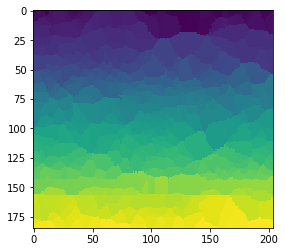

In [12]:
plt.imshow(mask)

# Fitness Function Testing


In [13]:
%matplotlib inline
import matplotlib.pylab as plt
from see import Segmentors

/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


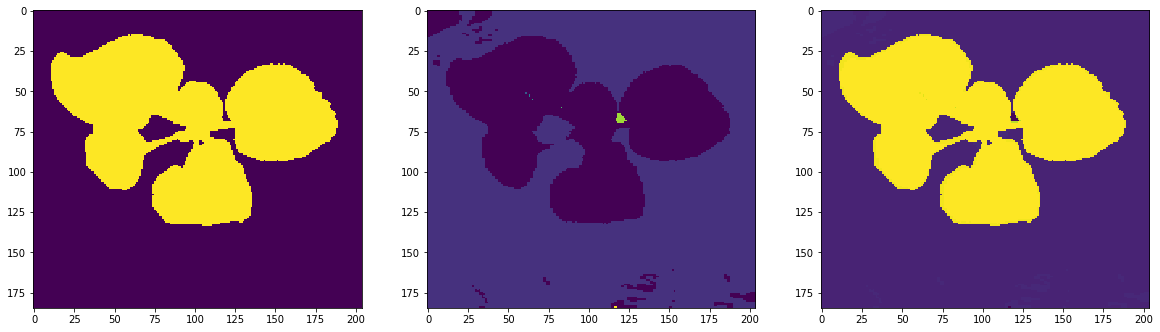

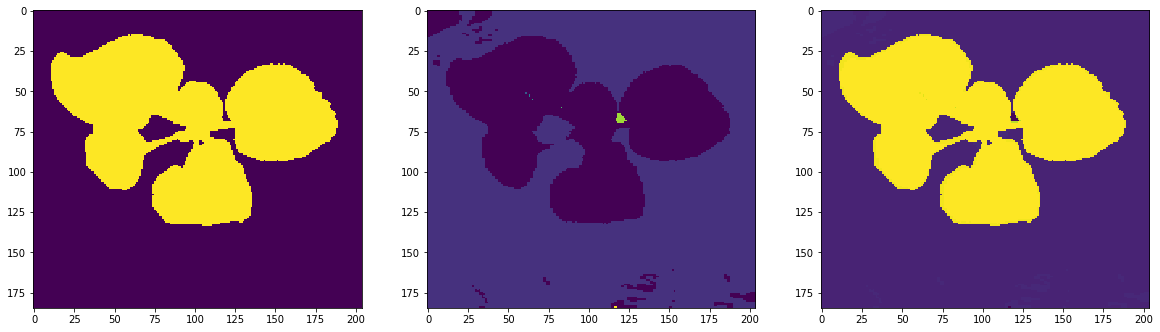

In [14]:
params = ['CT', 7563, 0.13, 2060, 0.01, 4342, 850, 10, 0.57, 1863, 1543, 134, 3, 1, 0.35, (1, 1), 8.1, 'checkerboard', 'checkerboard', 3, 7625, -35, 0.0, 0.0, 0.0]
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)

from scipy import misc, ndimage #DIRK DEBUGGING
gmask, _ = ndimage.measurements.label(gmask) # DIRK DEBUGGING    
mask, _ = ndimage.measurements.label(mask) # DIRK DEBUGGING

JupyterGUI.showthree(gmask,mask, gmask*53-mask) #This is a hack to try to see what is going on.


In [15]:
%%time 
Segmentors.FitnessFunction_old(mask,gmask)

AttributeError: module 'see.Segmentors' has no attribute 'FitnessFunction_old'

In [16]:
%%time 
fitness, best = Segmentors.FitnessFunction(mask,gmask)
fitness

ValueError: too many values to unpack (expected 2)

In [17]:
gmask.shape

(185, 204)

In [18]:
gmask.shape[0]*gmask.shape[1]

37740

In [ ]:
7098-6919

In [ ]:
newmask = mask.copy()
for key in best:
    newmask[mask==key] = best[key]
plt.imshow(newmask)
plt.colorbar()

# Code Inspection?
The ```inspect``` library is something we will like

In [ ]:
import inspect
params = ['CV', 7563, 0.13, 2060, 0.01, 4342, 850, 10, 0.57, 1863, 1543, 134, 3, 1, 0.35, (1, 1), 8.1, 'checkerboard', 'checkerboard', 3, 7625, -35, 0.0, 0.0, 0.0]
seg = Segmentors.algoFromParams(params)
print(inspect.getsource(seg.evaluate))

In [ ]:
help(seg)

In [ ]:
x = inspect.getsource(seg.evaluate)
x = x.split('\n')
for l in x:
    if not "#XX" in l:
        print(l[8:])

# Run Genetic Search

In [ ]:
from see import GeneticSearch

In [ ]:
ee = GeneticSearch.Evolver(img, gmask, pop_size=5)

In [ ]:
#ee.run(startfile="test.json", checkpoint="checkpoint.json")

In [ ]:
population = ee.run(100, checkpoint="checkpoint.json")

In [ ]:
print(ee.hof[0])

In [ ]:
%%time 
seg = Segmentors.algoFromParams(ee.hof[0])
mask = seg.evaluate(img)

In [ ]:
%%time 
Segmentors.FitnessFunction_old(mask,gmask)

In [ ]:
%%time 
Segmentors.FitnessFunction(mask,gmask)

In [ ]:
mask = seg.evaluate(img)
JupyterGUI.showthree(img, mask, gmask)

In [ ]:
x = inspect.getsource(seg.evaluate)
x = x.split('\n')
for l in x:
    if not "#XX" in l:
        print(l[8:])

# Playing with the parameters and individual classes.  

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from see import Segmentors

In [ ]:
x = Segmentors.algorithmspace

In [ ]:
tot = len(Segmentors.algorithmspace)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,5,1)
ax.imshow(img)
for index, segkey in enumerate(Segmentors.algorithmspace):
    ax = fig.add_subplot(5,5,index+2)
    seg = Segmentors.algorithmspace[segkey]()
    mask = seg.evaluate(img.copy())
    ax.imshow(mask)
    plt.title(segkey)

Test the parameter parser

In [ ]:
seg = Segmentors.MorphGeodesicActiveContour()
seg.params['alpha']  = 333
seg.params['sigma'] = 0.3
seg.params['iterations'] = 10
seg.params['init_level_set_morph'] = 'circle'
seg.params['smoothing'] = 4
seg.params['balloon'] = -10
mask = seg.evaluate(img)
JupyterGUI.showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.ColorThreshold()
seg.params['channel'] = 1
seg.params['mu'] = 0.3
seg.params['sigma'] = 0.6
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.Watershed()
seg.params['compactness'] = 10
mask = seg.evaluate(img)
JupyterGUI.showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.Slic()
seg.params['n_segments'] = 15
seg.params['compactness'] = 1
seg.params['iterations']= 20
seg.params['sigma'] = 5
print(f"({seg.params['n_segments']}, {seg.params['compactness']}, {seg.params['iterations']}, {seg.params['sigma']})")
mask = seg.evaluate(img)
JupyterGUI.showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.QuickShift()
#kernel_size=3, max_dist=6, ratio=0.5)
seg.params['kernel_size'] = 5
seg.params['max_dist'] = 60
seg.params['sigma'] = 0.5
seg.params['seed'] = 1
mask = seg.evaluate(img)
JupyterGUI.showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.Felzenszwalb()
print(f"{seg.params['algorithm']} = ({seg.params['scale']}, {seg.params['sigma']}, {seg.params['min_size']})")
mask = seg.evaluate(img)
JupyterGUI.showthree(img, mask, gmask)

In [ ]:
params = ['FB', 515,  0.566, 984, 0.09, 92, 436, 10, 0.59, 4, 841, 134, 8, 0.01, 0.85, [2, 1], 0.0, 'checkerboard', 'circle', 1, 895, -49, 105, 121, 2]
seg = Segmentors.algoFromParams(params)
print(f"{seg.params['algorithm']} = ({seg.params['scale']}, {seg.params['sigma']}, {seg.params['min_size']})")
mask = seg.evaluate(img)
plt.imshow(mask)

In [ ]:
params = ['CT', 7563, 0.13, 2060, 0.01, 4342, 850, 10, 0.57, 1863, 1543, 134, 3, 1, 0.35, (1, 1), 8.1, 'checkerboard', 'checkerboard', 3, 7625, -35, 0.0, 0.0, 0.0]
seg = Segmentors.algoFromParams(params)
print(f"{seg.params['algorithm']} = ({seg.params['scale']}, {seg.params['sigma']}, {seg.params['min_size']})")
mask = seg.evaluate(img)
plt.imshow(mask)

Current Fitness function

$$\frac{(p+2)^{log(|m-n|+2)}}{L \geq n}$$

In [ ]:
[fitness, mask] = Segmentors.runAlgo(img, gmask, params, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['FB', 66, 0.667, 889, 0.05, 580, 74, 10, 0.34, 365, 191, 134, 1, 0.1, 0.72, [1, 2], 4.3, 'checkerboard', 'circle', 4, 649, -49, 148, 23, 2]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['FB', 690, 0.457, 656, 0.03, 569, 557, 10, 0.5, 453, 797, 134, 3, 100, 0.82, [1, 2], 7.5, 'disk', 'circle', 1, 868, -49
, 167, 91, 2]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['AC', 535, 0.203, 743, 0.09, 932, 740, 10, 0.95, 653, 855, 134, 2, 0.0001, 0.83, [1, 2], 1.4, 'disk', 'checkerboard', 4, 254, -49, 116, 7, 2]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
print(seg)

In [ ]:
Segmentors.FitnessFunction(mask,mask)

In [ ]:
p2 = ['SC', 6754, 0.966, 7442, 0.06, 9630, 1340, 10, 0.1, 6547, 9204, 134, 5, 10, 0.45, (1, 1), 6.3, 'small disk', 'checkerboard', 1, 695, 49, 0.0, 0.0, 0.0]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['CT', 6560, 0.046, 5877, 0.03, 5469, 4925, 10, 0.62, 5231, 1695, 134, 5, 100, 0.59, (1, 1), 4.9, 'checkerboard', 'circle', 1, 8491, -39, 0.0, 0.0, 0.0]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from see import Segmentors
p2 = ['FB', 6925, 0.955, 521, 0.07, 7916, 7771, 10, 0.45, 6657, 1525, 134, 1, 10000, 0.19, (2, 1), 6.5, 'checkerboard', 'circle', 6, 9777, -26, 0.0, 0.0, 0.0]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showthree(mask, gmask, mask-gmask)
plt.title(fitness)

In [ ]:
JupyterGUI.showSegment(img,mask)

In [ ]:
p2 = ['MCV', 7594, 0.766, 5802, 0.08, 3986, 8628, 10, 0.84, 1242, 6766, 134, 3, 0.0001, 0.38, (2, 1), 2.1, 'checkerboard', 'circle', 4, 5672, 14, 0.0, 0.0, 0.0]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
JupyterGUI.showtwo(mask, gmask)
plt.title(fitness)